# Clustering

## K-means

Going to generate 5 clusters of points on a 2-D graph, implement k-means, and then try to find a metric to find the best k.

In [50]:
import random
import numpy as np

random.seed(42196)
np.random.seed(42196)

# 5 clusters, manually selected centers
cluster_centers = [
    (4,6),
    (33,-28),
    (-19,-21),
    (40,30),
    (-26,37),
]

data = []
for i in range(5):
    std_dev = random.random() * 5. + 5.
    print (f"Cluster {i}: ({cluster_centers[i][0]}, {cluster_centers[i][1]}), std dev {std_dev:.2f}")
    
    # between 10 to 25 samples per cluster
    cluster = np.random.normal(0, std_dev, (random.randint(10,25),2))
    cluster[:,0] += cluster_centers[i][0]
    cluster[:,1] += cluster_centers[i][1]
    data.append(cluster)
    
all_data = data[0]
for i in range(1,len(data)):
    all_data = np.vstack((all_data, data[i]))

Cluster 0: (4, 6), std dev 6.14
Cluster 1: (33, -28), std dev 5.05
Cluster 2: (-19, -21), std dev 9.15
Cluster 3: (40, 30), std dev 8.45
Cluster 4: (-26, 37), std dev 7.68


Print a true graph of the clusters.

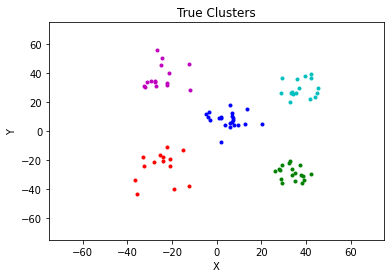

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt_colors = "bgrcmykw"
plt_marks = "ov^<>s*x" # this is not all markers, just enough for me to work with

#plt.figure(figsize=(10,7)) # 10 is width, 7 is height
for i in range(len(data)):
    plt.plot(data[i][:,0], data[i][:,1], f"{plt_colors[i]}.")
plt.title('True Clusters')  
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-75, 75)
plt.ylim(-75, 75)
plt.show()

Print all points.

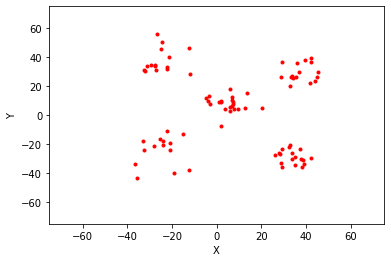

In [52]:
plt.plot(all_data[:,0], all_data[:,1], f"r.")
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-75, 75)
plt.ylim(-75, 75)
plt.show()

My k-means implementation. Just start with knowing there are 5 clusters.

In [84]:
#np.random.seed(42196)
# example of not convering if you use the seed above
means = np.random.random((5,2)) * 150. - 75.

converged = False
assignments_prev = None
assignments = np.zeros((all_data.shape[0]), dtype=int)

# iterate until no changes
counter = 0
while assignments_prev is None or np.sum(assignments - assignments_prev) != 0:
    counter += 1
    assignments_prev = np.copy(assignments)
    
    # compute assignments
    for p, point in enumerate(all_data):
        closest = None
        close_val = None
        for i in range(len(means)):
            distance = ((point[0] - means[i][0]) ** 2 + (point[1] - means[i][1]) ** 2) ** 0.5
            if close_val is None:
                close_val = distance
                closest = i
            elif distance < close_val:
                close_val = distance
                closest = i
        assignments[p] = closest
        
    # recompute means
    counts = np.zeros((5), dtype=float)
    sums = np.zeros((5,2), dtype=float)
    for i in range(assignments.shape[0]):
        sums[assignments[i]] += all_data[i]
        counts[assignments[i]] += 1.
    for i in range(5):
        if counts[i] != 0.:
            means[i] = sums[i] / counts[i]
            
print (f"Ran {counter} iterations.")
print (assignments)
print (means)

Ran 11 iterations.
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4]
[[ 33.76827052 -28.83276784]
 [-24.94186077 -24.26031858]
 [  5.10814565   7.88686827]
 [ 37.58165183  29.37187988]
 [-24.90677475  37.4340443 ]]


Graph my results.

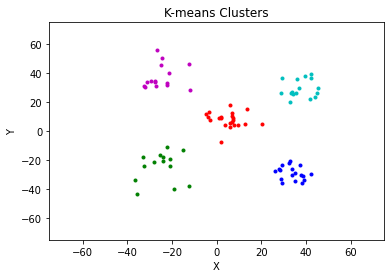

In [85]:
for i in range(5):
    x = []
    y = []
    for p in range(assignments.shape[0]):
        if assignments[p] == i:
            x.append(all_data[p][0])
            y.append(all_data[p][1])
    plt.plot(x, y, f"{plt_colors[i]}.")

plt.title('K-means Clusters')  
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-75, 75)
plt.ylim(-75, 75)
plt.show()

## Expectation Maximization

Recreating the example in this [YouTube lecture](https://youtu.be/iQoXFmbXRJA). Two 1-D clusters, we don't know which points belong to which cluster. Estimate the mean and variance.

In [101]:
np.random.seed(42196)
# manually set
means = np.random.random(2) * 10.
variances = np.random.random(2) * 4. + 4.

print (f"Cluster 1, mu={means[0]:.2f}, sigma={variances[0]**0.5:.2f}")
print (f"Cluster 2, mu={means[1]:.2f}, sigma={variances[1]**0.5:.2f}")

Cluster 1, mu=6.66, sigma=2.58
Cluster 2, mu=3.28, sigma=2.01


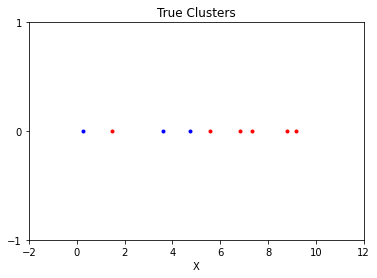

In [105]:
np.random.seed(42196)

# generate data
cluster_1 = np.random.normal(means[0], variances[0]**0.5, (np.random.randint(3,7)))
cluster_2 = np.random.normal(means[1], variances[1]**0.5, (np.random.randint(3,7)))

# plot
plt.plot(cluster_1, np.zeros(cluster_1.shape), "r.")
plt.plot(cluster_2, np.zeros(cluster_2.shape), "b.")
plt.title('True Clusters')  
plt.xlabel('X')
plt.xlim(-2, 12)
plt.ylim(-1, 1)
plt.yticks((-1,0,1))
plt.show()

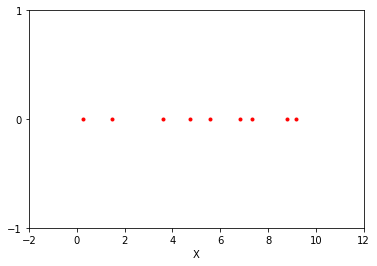

In [106]:
all_data = np.hstack((cluster_1, cluster_2))
# plot
plt.plot(all_data, np.zeros(all_data.shape), "r.")
plt.xlabel('X')
plt.xlim(-2, 12)
plt.ylim(-1, 1)
plt.yticks((-1,0,1))
plt.show()

Run algorithm.